# 决策树基础

## 目录

- [概览](#概览)
- [基础知识](#基础知识)
- [算法](#算法)
- [1.ID3算法](#1.ID3算法)
    - [ID3算法流程](#ID3算法流程)
- [2.C4.5算法](#2.C4.5算法)
- [3.CART算法](#3.CART算法)
    - [基尼系数](#基尼系数)
    - [剪枝](#剪枝)
    - [CART算法流程](#CART算法流程)
    - [算法总结](#算法总结)
- [决策树实践](#决策树实践)
- [决策树的可解释性](#决策树的可解释性)
- [参考链接](#参考链接)

## 概览

决策树是一种分类和回归的基本模型，可从三个角度来理解它，即：
  
  ● 一棵树。
  
  ● if-then规则的集合，该集合是决策树上的所有从根节点到叶节点的路径的集合。
  
  ● 定义在特征空间与类空间上的条件概率分布，决策树实际上是将特征空间划分成了互不相交的单元，每个从根到叶的路径对应着一个单元。决策树所表示的条件概率分布由各个单元给定条件下类的条件概率分布组成。实际中，哪个类别有较高的条件概率，就把该单元中的实例强行划分为该类别。
  
  主要的优点有两个：
  
  ● 模型具有可解释性，容易向业务部门人员描述。
  
  ● 分类速度快。
  

## 基础知识

**熵**：$H(x) = -\sum_{i=1}^np_ilog(p_i)$

**条件熵**：$H(Y|X) = H(X,Y)-H(X) = \sum_XP(X)H(Y|X) = -\sum_{X,Y}logP(Y|X)$

**基尼系数（Gini index）**：$Gini(p) = \sum_{k=1}^Kp_k(1-p_k) = 1-\sum_{k=1}^Kp_k^2$，基尼指数反应了从数据集中随机抽取两个样本，其类标不一致的概率。

## 算法

决策树的损失函数通常是正则化的极大似然函数，学习的策略是以损失函数为目标函数的最小化。

所以决策树的本质和其他机器学习模型是一致的，有一个损失函数，然后去优化这个函数；然而，区别就在于如何优化。

决策树采用**启发式算法**来近似求解最优化问题，得到的是次最优的结果。

该启发式算法可分为三步：

- 特征选择
- 模型生成
- 决策树的剪枝

决策树学习算法通常是一个递归地选择最优特征，并根据该特征对训练数据进行分割。

选择最优特征要根据**特征的分类能力**，特征分类能力的衡量通常采用信息增益或信息增益比。

决策树学习常用的算法主要有以下三种：



## 1.ID3算法

ID3使用**信息增益**作为特征选取的依据：

$G(D, A) = H(D) - H(D|A)$，即**经验熵**和**经验条件熵**的差值，其中$D$是训练数据集，$A$是特征。

$H(D)=-\sum_{k=1}^K\frac{|C_k|}{|D|}log\frac{|C_k|}{|D|}$，其中，$|C_k|$是属于类$C_k$的个数，$|D|$是所有样本的个数。

$H(D|A)=\sum_{i=1}^np_{a_i}H(D|a_i)=\sum_{i=1}^n\frac{|D_i|}{|D|}H(D_i)=-\sum_{i=1}^n\frac{|D_i|}{|D|}\sum_{k=1}^{K}\frac{|D_{ik}|}{|D_i|}log\frac{|D_{ik}|}{|D_i|}$，其中，特征$A$有$n$个不同的取值$\{a_1, a_2, ..., a_n\}$，根据特征$A$的取值将$D$划分为$n$个子集$D_1, D_2, ..., D_n$， $|D_i|$是$D_i$的样本个数，$D_{ik}$是$D_i$中属于类$C_k$的样本集合。

### ID3算法流程

- 1.计算$A$中各个特征对$D$的信息增益，选择信息增益最大的特征：$A_g$。
- 2.若$A_g$的信息增益小于**阈值$\epsilon$**，则置为单结点树，并将$D$中实例数最多的类$C_k$作为该结点的类标记。
- 3.否则，对$A_g$的每一可能值：$a_i$，依据$A_g = a_i$将$D$分割为若干非空子集$D_i$，同样，将$D_i$中实例数最多的类作为类标，构建子结点。
- 4.对第$i$个子结点，以$D_i$为训练集，以$A-{A_g}$为特征集，递归地调用上面1-3步。

## 2.C4.5算法

C4.5使用**信息增益比**，作为特征选取的依据：

**信息增益比**：$g_R(D,A)=\frac{g(D,A)}{H_A(D)}$，即信息增益除以训练集$D$关于特征$A$的熵，$H_A(D) = -\sum_{i=1}^n\frac{D_i}{D}log_2\frac{D_i}{D}$，$n$是特征$A$取值的个数。

**为什么使用信息增益比？**先回顾信息增益：$H(D|A)=-\sum_{i=1}^n\frac{|D_i|}{|D|}\sum_{k=1}^{K}\frac{|D_{ik}|}{|D_i|}log\frac{|D_{ik}|}{|D_i|}$，对于极限情况，如果某个特征$A$可以将数据集$D$完全分隔开，且每个子集的个数都是1，那么$log\frac{|D_{ik}|}{|D_i|} = log1 = 0$，于是信息增益取得最大。但这样的特征并不是最好的。

也就是说，使用信息增益作为特征选择的标准时，容易偏向于那些**取值比较多**的特征，导致训练出来的树非常的**宽**然而**深度不深**的树，非常容易导致**过拟合**。

而采用信息增益比则有效地抑制了这个缺点：取值多的特征，以它作为根节点的单节点树的熵很大，即$H_A(D)$较大，导致信息增益比减小，在特征选择上会更加合理。

C4.5具体算法类似于ID3算法。

## 3.CART算法

**CART（Classification And Regression Tree）**本身是一种分类回归树，即，它既可以用来解决分类问题，也可以用来解决回归问题。

**CART**树是一棵**二叉树**，内部结点特征的取值是“是”和“否”，左分支是取值为“是”的分支，右分支是取值是“否”的分支。

因此，注意到CART的生成过程和前面的ID3和C4.5略有不同。

### 基尼系数

CART使用**基尼系数（Gini index）**最小化准则，进行特征选择。

**基尼系数（Gini index）**：

$Gini(D) = 1-\sum_{k=1}^{K}(\frac{|C_k|}{|D|})^2$

$Gini(D,A) = \sum_i\frac{D_i}{D}Gini(D_i)$

基尼指数$Gini(D,A)$表示经$A=a$分割后集合$D$的**不纯度（impurity）**，基尼指数越大，纯度越低，和熵类似。

### 剪枝

CART算法算法涉及到决策树的**剪枝**：即，为了防止出现过拟合现象，要把过于复杂的树进行剪枝，将其简化。

决策树的剪枝往往通过极小化决策树整体的损失函数（loss function）或者代价函数（cost function）来实现。

**损失函数**：$C_α(T) = C(T)+α|T|=\sum_{t=1}^{|T|}N_tH_t(T)+α|T|$

其中，$|T|$是树$T$的叶节点个数，$t$是其中一个结点，$N_t$是这个结点的样本个数，$H_t(T)$是这个结点的经验熵。

$C(T)$表示模型对训练数据的预测误差， $α|T|$则是正则化项。

使用叶子结点的熵作为的模型的评价是因为：

**如果分到该叶节点的所有样本都属于同一类，那么分类效果最好，熵最小。**

**一般的剪枝算法**：

1.计算每个结点的经验熵。

2.递归地从叶节点向上回缩：设一叶结点回缩到父结点之前和之后，树分别是$T_B$和$T_A$，其对应的损失函数值分别是$C_α(T_B)$与$C_α(T_A)$，如果$C_α(T_A)≤C_α(T_B)$，则剪枝，即将父节点变成新的叶结点。

### CART算法流程

**1.决策树生成**：

- （1）. 对现有特征A的每一个特征，每一个可能的取值a，**根据样本点对$A=a$的测试是“是”还是“否”**，将$D$分割成$D_1$和$D_2$两部分，计算$A=a$时的基尼指数。
- （2）.选择基尼指数最小的特征机器对应的切分点作为**最优特征**和**最优切分点**。
- （3）.递归调用，直到满足停止条件。

**停止条件**：

- 结点中样本个数小于预定阈值；
- 样本集的基尼指数小于预定阈值（基本属于同一类）；
- 没有更多特征。
    
**2.CART剪枝**：

相比一般剪枝算法，CART剪枝算法的优势在于，**不用提前确定$α$值**，而是在剪枝的同时找到最优的α值。

对于固定的$α$值，一定存在让$C_α(T)$最小的子树，记为$T_α$。

对于某个结点$t$，单结点树的损失函数是：$C_α(t) = C(t) + α$，而以$t$为根的子树$T_t$的损失函数是：$C_α(T_t) = C(T_t) + α|T_t|$。

当$α$充分小的时候，有$C_α(T_t) < C_α(t)$；

当$α$增大到某一$α$时有：$C_α(T_t) = C_α(t)$。

即，只要$α = \frac{ C(t)-C(T_t)}{|T_t|-1}$，就可以保证$T_t$和$t$有相同的损失函数，也就代表着可以对$T_t$剪枝。

因此，对于每个内部结点，计算$g(t) = \frac{C(t)-C(T_t)}{|T_t|-1}$，代表**剪枝后整体损失函数减少的程度。**

将最小的$g(t)$设为$α_1$，剪枝得$T_1$，不断地重复此步骤，可以增加$α$，获得一系列$T$。

通过**交叉验证**，从剪枝得到的字数序列$T_0, T_1, ..., T_n$中选取最优子树$T_α$。

## 算法总结

ID3算法/C4.5算法/CART算法。

ID3算法和C4.5算法用于生成**分类树**，区别主要在于选取特征的依据，前者是**信息增益**，后者是**信息增益比**。

CART算法可以生成**分类树**和**回归树**，使用**基尼指数**选取特征，并且不用提前确定$α$值，而是在剪枝的同时找到最优的α值。

## 决策树实践

使用sklearn的决策树实现来看看实践中如何使用决策树模型，

sklearn中的决策树模型：**DecisionTreeClassifier**。

```
class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
```

重要参数：

- `criterion`: “gini” for the Gini impurity and “entropy” for the information gain.
- `max_depth`: 树的最大深度。
- `min_impurity_decrease`: 最小的基尼指数下降。

下面代码摘自[这里](http://blog.csdn.net/sinat_22594309/article/details/59090895)：

In [20]:
import numpy as np  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split  
from sklearn import datasets  
  
#读取数据，划分训练集和测试集  
iris=datasets.load_iris()  
# 只保留数据集的前五个特征
x=iris.data[:, :5]
y=iris.target  
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)  
#模型训练  
model = DecisionTreeClassifier(max_depth=3)  
model = model.fit(x_train,y_train)  
y_test_hat = model.predict(x_test)  
res=y_test == y_test_hat  
acc=np.mean(res)  
print '正确率是%.2f%%'%(acc*100)  

正确率是95.56%


比较不同深度对预测准确率的影响：

正确率是55.56%
正确率是55.56%
正确率是75.56%
正确率是75.56%
正确率是75.56%
正确率是75.56%
正确率是66.67%
正确率是64.44%
正确率是62.22%
正确率是57.78%
正确率是62.22%


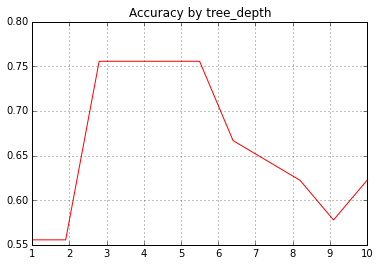

In [2]:
from matplotlib import pyplot as plt 
%matplotlib inline 
#模型训练  
depth_test=np.linspace(1,10,11)  
accurate=[]  
for depth in depth_test:  
    test_model=DecisionTreeClassifier(max_depth=depth)  
    test_model=test_model.fit(x_train,y_train)  
    y_test_hat=test_model.predict(x_test)  
    res=y_test==y_test_hat  
    acc=np.mean(res)  
    accurate.append(acc)  
    print '正确率是%.2f%%'%(acc*100)  
plt.plot(depth_test,accurate,'r-')  
plt.grid()  
plt.title('Accuracy by tree_depth')  
plt.show()  

### 决策树的可解释性

本文一开始提到决策树的一个优点是其可解释性。

接下来通过一些代码来演示其可解释性，代码来自sklearn官网。

1.**用graphviz可视化决策树**：

In [4]:
import graphviz 
import sklearn.tree  as tree
# sklearn 支持将决策树模型导出成可视化的graphviz
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
#graph

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

2.**手动输出决策树信息**

sklearn中决策树模型的信息保存在`xxx.tree_`中：

```
Attributes
----------
node_count : int
    The number of nodes (internal nodes + leaves) in the tree.

capacity : int
    The current capacity (i.e., size) of the arrays, which is at least as
    great as `node_count`.

max_depth : int
    The maximal depth of the tree.

children_left : array of int, shape [node_count]
    children_left[i] holds the node id of the left child of node i.
    For leaves, children_left[i] == TREE_LEAF. Otherwise,
    children_left[i] > i. This child handles the case where
    X[:, feature[i]] <= threshold[i].

children_right : array of int, shape [node_count]
    children_right[i] holds the node id of the right child of node i.
    For leaves, children_right[i] == TREE_LEAF. Otherwise,
    children_right[i] > i. This child handles the case where
    X[:, feature[i]] > threshold[i].

feature : array of int, shape [node_count]
    feature[i] holds the feature to split on, for the internal node i.

threshold : array of double, shape [node_count]
    threshold[i] holds the threshold for the internal node i.

value : array of double, shape [node_count, n_outputs, max_n_classes]
    Contains the constant prediction value of each node.

impurity : array of double, shape [node_count]
    impurity[i] holds the impurity (i.e., the value of the splitting
    criterion) at node i.

n_node_samples : array of int, shape [node_count]
    n_node_samples[i] holds the number of training samples reaching node i.

weighted_n_node_samples : array of int, shape [node_count]
    weighted_n_node_samples[i] holds the weighted number of training samples
    reaching node i.
```

In [9]:
# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:

n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold

print "n_nodes:  ", n_nodes
print "children_left:  ", children_left
print "children_right: ", children_right
print "feature: ", feature
print "threshold: ", threshold

n_nodes:   13
children_left:   [ 1  2  3 -1 -1 -1  7  8 -1 -1 11 -1 -1]
children_right:  [ 6  5  4 -1 -1 -1 10  9 -1 -1 12 -1 -1]
feature:  [ 0  1  0 -2 -2 -2  0  1 -2 -2  1 -2 -2]
threshold:  [ 5.44999981  2.80000019  4.69999981 -2.         -2.         -2.          6.25
  3.45000005 -2.         -2.          2.54999995 -2.         -2.        ]


注意到上面出现了-1和-2这些让人觉得奇怪的值，解释一下：
```python
TREE_LEAF = -1
TREE_UNDEFINED = -2
```

In [10]:
# 遍历树，获取每个结点的深度和每个结点是否是叶结点
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))

The binary tree structure has 13 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 5.44999980927 else to node 6.
	node=1 test node: go to node 2 if X[:, 1] <= 2.80000019073 else to node 5.
		node=2 test node: go to node 3 if X[:, 0] <= 4.69999980927 else to node 4.
			node=3 leaf node.
			node=4 leaf node.
		node=5 leaf node.
	node=6 test node: go to node 7 if X[:, 0] <= 6.25 else to node 10.
		node=7 test node: go to node 8 if X[:, 1] <= 3.45000004768 else to node 9.
			node=8 leaf node.
			node=9 leaf node.
		node=10 test node: go to node 11 if X[:, 1] <= 2.54999995232 else to node 12.
			node=11 leaf node.
			node=12 leaf node.


In [8]:
# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = model.decision_path(x_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = model.apply(x_test)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] != node_id:
        continue

    if (x_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature[node_id],
             x_test[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

Rules used to predict sample 0: 
decision id node 9 : (X_test[0, -2] (= 5.8) > -2.0)

The following samples [0, 1] share the node [0] in the tree
It is 7 % of all nodes.


## 参考链接
 
-  [数据挖掘面试题之决策树必知必会](http://www.jianshu.com/p/fb97b21aeb1d)
- [机器学习笔记（五）决策树算法及实践](http://blog.csdn.net/sinat_22594309/article/details/59090895)